In [20]:
import pandas as pd
import numpy as np
import re
import sys
import matplotlib.pyplot as plt

sys.path.append('F:\Frederik\pfizer_mcrpc\paqc')

from paqc.utils import config_utils, utils
from paqc.connectors import csv

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Function to clean up newly created column names in the dummies

def clean_string(s):
    """
    Function that cleans up string, typically used for column names. Changes
    the incoming string s so that:
        - only lowercase
        - white spaces replaced by underscores
        - brackets replaced by underscores
        - multiple underscores in a row replaced by one
          underscore (e.g. ' (' -> '__' -> '_'
    :param s: string
    :return: new string
    """
    if isinstance(s, float):
        return s
    # only lowercase
    else:
        s = s.lower()
        # whites spaces, brackets, &, ;, , replaced by underscores
        s = re.sub(r'( )|(\()|(\))|(;)|(,)|(&)|(:)', '_', s)
        # multiple underscores in a row replaced by one underscore
        s = re.sub(r'(_)\1+', r'\1', s)
        # trailing underscores are removed
        s = re.sub(r'[_]+$', '', s)
        return s

In [4]:
dict_config = config_utils.config_open(r'general_config_uro_EMR.yml')[1]

In [5]:
df_uro = csv.read_csv(dict_config, dict_config['general']['input1'])

In [6]:
df_uro.shape
df_uro.head()

(3644, 105)

,patient_id,pn_flag,lookback_date,index_date,deidcrpc2flag,deidcrpc2date,deidcrpc3flag,deidcrpc3date,deidmetastaticflag,deidmetastaticdate,...,uro_latest_t_t2b,uro_latest_t_t2c,uro_latest_t_t3a,uro_latest_t_t3b,uro_latest_n_n0,uro_latest_n_nx,uro_latest_m_m1a,uro_latest_m_m1b,uro_latest_m_m1c,uro_latest_m_mx
0,1563563420,0,2012-05-14,2014-05-14,1,2015-04-20,1,2016-07-20,0,NaT,...,0,0,0,0,0,0,0,0,0,0
1,1165766479,0,2012-02-05,2014-02-04,1,2013-01-04,0,NaT,1,NaT,...,0,0,0,0,0,0,0,0,0,0
2,91728018,0,2013-01-19,2015-01-19,0,NaT,0,NaT,0,NaT,...,0,0,0,0,0,0,0,0,0,0
3,240116111,0,2013-09-29,2015-09-29,0,NaT,0,NaT,0,NaT,...,0,1,0,0,0,0,0,0,0,0
4,72619119,0,2012-02-06,2014-02-05,0,NaT,0,NaT,1,NaT,...,0,0,1,0,0,0,0,0,0,0


In [7]:
# Get rid of some columns that have their dates after the index date
ls_wrong_dates = ['deidcrpc2date','deidcrpc2flag','deidcrpc3date','deidcrpc3flag','deidmetastaticdate','deidmetastaticflag']
# df_uro = df_uro.drop(columns=ls_wrong_dates)

In [8]:
df_uro.shape
df_uro.head()

(3644, 105)

,patient_id,pn_flag,lookback_date,index_date,deidcrpc2flag,deidcrpc2date,deidcrpc3flag,deidcrpc3date,deidmetastaticflag,deidmetastaticdate,...,uro_latest_t_t2b,uro_latest_t_t2c,uro_latest_t_t3a,uro_latest_t_t3b,uro_latest_n_n0,uro_latest_n_nx,uro_latest_m_m1a,uro_latest_m_m1b,uro_latest_m_m1c,uro_latest_m_mx
0,1563563420,0,2012-05-14,2014-05-14,1,2015-04-20,1,2016-07-20,0,NaT,...,0,0,0,0,0,0,0,0,0,0
1,1165766479,0,2012-02-05,2014-02-04,1,2013-01-04,0,NaT,1,NaT,...,0,0,0,0,0,0,0,0,0,0
2,91728018,0,2013-01-19,2015-01-19,0,NaT,0,NaT,0,NaT,...,0,0,0,0,0,0,0,0,0,0
3,240116111,0,2013-09-29,2015-09-29,0,NaT,0,NaT,0,NaT,...,0,1,0,0,0,0,0,0,0,0
4,72619119,0,2012-02-06,2014-02-05,0,NaT,0,NaT,1,NaT,...,0,0,1,0,0,0,0,0,0,0


## Make datedifference variables 

In [9]:
df_uro.dtypes.unique()

array([dtype('int64'), dtype('<M8[ns]'), dtype('float64')], dtype=object)

In [10]:
df_datecols = df_uro.select_dtypes(include=['<M8[ns]']).drop(columns=['index_date', 'lookback_date'])
df_datecols.shape

(3644, 40)

In [11]:
# Creating date difference variables
df_dd = pd.DataFrame()
for date_col in df_datecols:
    dd_col = date_col + '_index_dd'
    df_dd[dd_col] = (df_uro['index_date'] - df_datecols[date_col]).dt.days

In [12]:
df_dd.shape
df_dd.head()

(3644, 40)

,deidcrpc2date_index_dd,deidcrpc3date_index_dd,deidmetastaticdate_index_dd,uro_psa_date1_index_dd,uro_psa_date2_index_dd,uro_psa_date3_index_dd,uro_psa_date4_index_dd,uro_psa_date5_index_dd,uro_psa_date6_index_dd,uro_psa_date7_index_dd,...,uro_free_testo_date3_index_dd,uro_free_testo_date4_index_dd,uro_free_testo_date5_index_dd,uro_free_testo_date6_index_dd,uro_free_testo_date7_index_dd,uro_tnm_date_index_dd,uro_latest_t_date_index_dd,uro_latest_n_date_index_dd,uro_latest_m_date_index_dd,uro_latest_gleason_date_index_dd
0,-341.0,-798.0,NaN,133.0,194.0,225.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,396.0,NaN,NaN,3.0,126.0,309.0,399.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,120.0,605.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.0,59.0,NaN,NaN,NaN
4,NaN,NaN,NaN,127.0,431.0,584.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,461.0,461.0,NaN,NaN,NaN


In [13]:
df_nodates = df_uro.select_dtypes(exclude=['<M8[ns]'])
df_uro_dd_dummies = pd.concat([df_dd, df_nodates], axis=1)
df_uro_dd_dummies.shape
df_uro_dd_dummies.head()

(3644, 103)

,deidcrpc2date_index_dd,deidcrpc3date_index_dd,deidmetastaticdate_index_dd,uro_psa_date1_index_dd,uro_psa_date2_index_dd,uro_psa_date3_index_dd,uro_psa_date4_index_dd,uro_psa_date5_index_dd,uro_psa_date6_index_dd,uro_psa_date7_index_dd,...,uro_latest_t_t2b,uro_latest_t_t2c,uro_latest_t_t3a,uro_latest_t_t3b,uro_latest_n_n0,uro_latest_n_nx,uro_latest_m_m1a,uro_latest_m_m1b,uro_latest_m_m1c,uro_latest_m_mx
0,-341.0,-798.0,NaN,133.0,194.0,225.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,396.0,NaN,NaN,3.0,126.0,309.0,399.0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,120.0,605.0,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,127.0,431.0,584.0,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0


### three columns are sometimes a lot after the index date

In [14]:
ls_cprc_columns = ['deidcrpc2date_index_dd','deidcrpc3date_index_dd','deidmetastaticdate_index_dd']

In [16]:
df_cprc = df_uro_dd_dummies[ls_cprc_columns]
df_cprc.head()

,deidcrpc2date_index_dd,deidcrpc3date_index_dd,deidmetastaticdate_index_dd
0,-341.0,-798.0,NaN
1,396.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [31]:
# A lot of values missing
(df_cprc.isnull()).sum()

deidcrpc2date_index_dd         1981
deidcrpc3date_index_dd         3225
deidmetastaticdate_index_dd    2036
dtype: int64

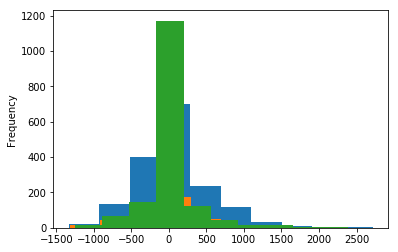

In [23]:
for column in ls_cprc_columns:
    df_cprc[column].plot(kind='hist')
plt.show()

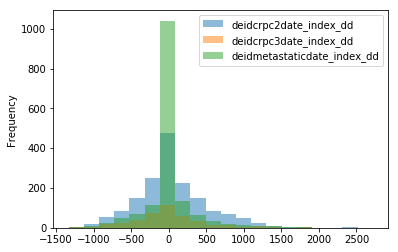

In [28]:
df_cprc.plot(kind='hist', alpha=0.5, bins=20)

## Get rid of sparse data 

In [30]:
## Some columns are too spare to calculate bivariate stats out
ss_sparse = (~df_uro_dd_dummies.isnull()).sum() < 3
ls_sparse_cols = ss_sparse[ss_sparse].index.tolist()

In [31]:
ls_sparse_cols

['uro_psa_date17_index_dd',
 'uro_total_testo_date8_index_dd',
 'uro_free_testo_date6_index_dd',
 'uro_free_testo_date7_index_dd',
 'uro_psa17',
 'uro_total_testo8',
 'uro_free_testo6',
 'uro_free_testo7']

In [32]:
df_uro_dd_dummies_no_sparse = df_uro_dd_dummies.drop(columns=ls_sparse_cols)

In [33]:
df_uro_dd_dummies_no_sparse.shape
df_uro_dd_dummies_no_sparse.head()

(3644, 89)

,uro_psa_date1_index_dd,uro_psa_date2_index_dd,uro_psa_date3_index_dd,uro_psa_date4_index_dd,uro_psa_date5_index_dd,uro_psa_date6_index_dd,uro_psa_date7_index_dd,uro_psa_date8_index_dd,uro_psa_date9_index_dd,uro_psa_date10_index_dd,...,uro_latest_t_t2b,uro_latest_t_t2c,uro_latest_t_t3a,uro_latest_t_t3b,uro_latest_n_n0,uro_latest_n_nx,uro_latest_m_m1a,uro_latest_m_m1b,uro_latest_m_m1c,uro_latest_m_mx
0,133.0,194.0,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,3.0,126.0,309.0,399.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,120.0,605.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
4,127.0,431.0,584.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0


## Save to csv 

In [34]:
df_uro_dd_dummies.to_csv(r'F:\Projects\Pfizer_mCRPC\Data\pre_modelling\EMR_Urology\02_EMR_urology_with_dd_with_dummies.csv')
df_uro_dd_dummies_no_sparse.to_csv(r'F:\Projects\Pfizer_mCRPC\Data\pre_modelling\EMR_Urology\02_EMR_urology_with_dd_with_dummies_no_sparse.csv')